# Infos

source
- https://www.geeksforgeeks.org/python-find-current-weather-of-any-city-using-openweathermap-api/
- https://openweathermap.org/

# import packages

In [7]:
#import pandas as pd
#import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
#import requests, json 
from  myfunc import get_api_data, weather_data_call,format_forecast
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from df2gspread import df2gspread as d2g

# import API Key

In [8]:
# use self made func
data=get_api_data("api_data/info.txt")
#arrange data
api_key=data[0][:-1]
#base_url_current=data[1][:-1]
base_url_forcast=data[2][:-1]
city_name=data[3][:-1]

# Get Data via API Call

In [9]:
request=weather_data_call(api_key,base_url_forcast,city_name)

In [10]:
#see result
#request.content
request.json()

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1586077200,
   'main': {'temp': 289.23,
    'feels_like': 284.82,
    'temp_min': 284.09,
    'temp_max': 289.23,
    'pressure': 1031,
    'sea_level': 1031,
    'grnd_level': 1026,
    'humidity': 51,
    'temp_kf': 5.14},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04d'}],
   'clouds': {'all': 63},
   'wind': {'speed': 4.97, 'deg': 124},
   'sys': {'pod': 'd'},
   'dt_txt': '2020-04-05 09:00:00'},
  {'dt': 1586088000,
   'main': {'temp': 291.28,
    'feels_like': 286.63,
    'temp_min': 287.43,
    'temp_max': 291.28,
    'pressure': 1030,
    'sea_level': 1030,
    'grnd_level': 1025,
    'humidity': 43,
    'temp_kf': 3.85},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04d'}],
   'clouds': {'all': 67},
   'wind': {'speed': 5.14, 'deg': 132},
   'sys': {'pod': 'd'},
   'dt_txt': '2020-04-05 12:00:00'},
  {'dt': 1

# export CSV 

## Format result

In [11]:
df_weather=format_forecast(request)

In [12]:
df_weather.head()

,temp,humidity,pressure,wind_speed,wind_dir,cloudcoverage,rain3h,snow3h,weather,description,icon
datetime,,,,,,,,,,,
2020-04-05 09:00:00,16.08,51,1031,5.0,124,63,0.0,0,Clouds,broken clouds,04d
2020-04-05 12:00:00,18.13,43,1030,5.1,132,67,0.0,0,Clouds,broken clouds,04d
2020-04-05 15:00:00,17.43,40,1028,5.0,126,0,0.0,0,Clear,clear sky,01d
2020-04-05 18:00:00,12.46,48,1028,5.0,117,0,0.0,0,Clear,clear sky,01n
2020-04-05 21:00:00,9.09,57,1028,5.2,129,0,0.0,0,Clear,clear sky,01n


In [13]:
len(df_weather)

40

## Export to csv

In [15]:
export_file_name=''
export_file_name='forecast/forcast_'+str(df_weather.index[0]).replace(' ','_').replace(':','-')+'.csv'
export_file_name

'forecast/forcast_2020-04-05_09-00-00.csv'

In [16]:
#df_weather.to_csv(export_file_name,sep=',')

## Plot

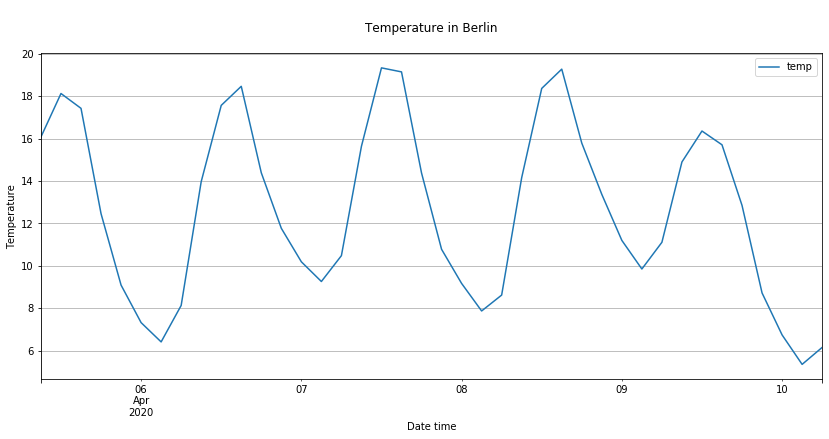

In [17]:
if True:
    plt.figure(figsize=(14,6))
    df_weather['temp'].plot()
    plt.xlabel('Date time')
    plt.ylabel('Temperature')
    plt.title('\nTemperature in Berlin\n')
    plt.grid()
    plt.legend()
    plt.show()

# Export Json database

In [18]:
##print
#request.content
#request.json()

In [19]:
##write Json
#export_file_name=''
#export_file_name='forecast/forcast_'+str(df_weather.index[0]).replace(' ','_').replace(':','-')+'.json'

In [20]:
#with open(export_file_name, 'wb') as f:
#    f.write(request.content)

In [21]:
##read Json
#with open(export_file_name) as json_file:
#    data = json.load(json_file)
#    i=0
#    for p in data['list']:
#        if i<5:
#            print(p['main']['temp'])
#        i+=1
        
        

# google API

In [22]:
#authentication to google api using JSON credential file
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('api_data/WDcred.json', scope)
client = gspread.authorize(creds)

#get current weather berlin sheet
forecast_weather = client.open('forecast_weather_berlin')

# get workbook id
spreadsheet_key = forecast_weather.id

In [12]:
#see the content of the file
#forecast_weather.sheet1.get_all_values()

In [40]:
#write new data
wks_name=  str((dt.datetime.now().timetuple().tm_yday +1 ) % 7)+' th'
d2g.upload(df_weather, spreadsheet_key, wks_name, credentials=creds, row_names=True)

<Worksheet '6 th' id:1470709953>